
# The goal

We aim to visualize history of Trello user activity - how many cards on specified board were completed each day.

Therefor the output will be a Time Series plot.

In [15]:
from source import client_init

Let's initialize the Trello client, by using API key and Token ID, which are stored in text files.

In [16]:
client = client_init("the_api_key.txt", "the_token.txt")

Now we can browse boards that are avaible in our Trello, let's take a look at some of them:

In [17]:
all_boards = client.list_boards()
print(all_boards[:3])

[<Board 1. Gromada JG>, <Board Blades ;3>, <Board Data Science>]


We will be interested in second one, since that's my main Board :)

Also let's extract cards info right away!

In [18]:
main_board = all_boards[1]

In [19]:
%%time
cards = main_board.get_cards()

Wall time: 2.55 s


It takes few seconds in my case. Let's see why:

In [20]:
print(len(cards))

2624


Few years of using Trello on daily basis results in quite rich card collection.

Now, we are interested in storing the **data** in some friendly form - we want to get card names, dates of completion (due_date) and finally card labels, for more nuanced analysis.

In [21]:
from source import get_dataframe

In [22]:
data = get_dataframe(cards)

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2624 entries, 2372 to 2623
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype              
---  ------  --------------  -----              
 0   Name    2624 non-null   object             
 1   Date    2363 non-null   datetime64[ns, UTC]
 2   Labels  2624 non-null   object             
dtypes: datetime64[ns, UTC](1), object(2)
memory usage: 82.0+ KB


To keep things simple, we will ignore labels for now. We are interested in the simplest time series, where we group cards by day and count their numbers:

In [24]:
from source import get_time_series

In [25]:
time_series = get_time_series(data)
time_series = time_series[:-128] # some leftover privacy :D

In [26]:
time_series.tail()

,count
Date,
2022-12-29,2
2022-12-30,8
2022-12-31,3
2023-01-01,1
2023-01-02,2


And now we can finally visualize this data:

In [27]:
from source import plot_MA

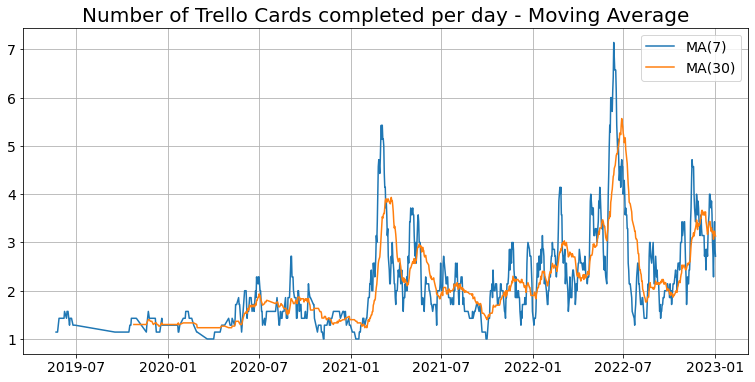

In [28]:
plot_MA(time_series, MA=[7,30])

# Mission accomplished!